In [9]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

In [10]:
ages = ['three', 'six', 'twelve']

dfs = []

for age in ages:
    file_path = f"/home/ldurieux/devmobeta_grasp/bursts_with_pc_{age}.csv"
    print(f"Lecture du fichier : {file_path}")
    
    df = pd.read_csv(file_path)
    
    df['time'] = df['time'].astype(float)
    #df['PC2'] = df['PC2'].astype(float)
    
    
    dfs.append(df)

# combiner tous les DataFrames en un seul
df_all = pd.concat(dfs, ignore_index=True)

print(df_all.head())
print(df_all.shape)


Lecture du fichier : /home/ldurieux/devmobeta_grasp/bursts_with_pc_three.csv
Lecture du fichier : /home/ldurieux/devmobeta_grasp/bursts_with_pc_six.csv
Lecture du fichier : /home/ldurieux/devmobeta_grasp/bursts_with_pc_twelve.csv
   subject    age epoch       system  trial   time cluster       PC1  \
0  sub-253  three    go  BrainVision      1 -2.298      C3 -1.641337   
1  sub-253  three    go  BrainVision      1 -2.688      C3  1.531324   
2  sub-253  three    go  BrainVision      2  0.778      C3 -4.089901   
3  sub-253  three    go  BrainVision      2 -1.050      C3  3.224046   
4  sub-253  three    go  BrainVision      3  2.334      C3  4.835654   

        PC2       PC3  ...      PC11      PC12      PC13      PC14      PC15  \
0  0.871260  5.294381  ... -0.727577  0.647452 -1.601184  0.619694 -0.819925   
1 -5.184664  1.898314  ... -2.187958  0.146829  0.937790  0.904363  0.747342   
2 -2.226000 -2.958757  ...  0.908986  0.339883  0.842018  1.536414 -1.143805   
3  2.149779  4.06

In [11]:
def compute_pc_evolution(df, pcs=list(range(1, 11)), bin_dt=0.05, smth_kern=5):
    epochs = ['go', 'grsp']
    epoch_limits = {'go': [-4.5, 4.5], 'grsp': [-4.5, 4.5]}

    time_axes = {}
    c_rates = {epoch: {} for epoch in epochs}
    group_means = {epoch: {} for epoch in epochs}

    for epoch in epochs:
        df_epoch = df[df['epoch'] == epoch]
        if len(df_epoch) == 0:
            continue

        bins = np.arange(epoch_limits[epoch][0], epoch_limits[epoch][1] + bin_dt, bin_dt)
        time_axis = bins[:-1] + bin_dt / 2
        time_axes[epoch] = time_axis
 
        for pc_idx in pcs:
            pc_col = f'PC{pc_idx}'
            if pc_col not in df.columns:
                continue

            subj_means = []

            for subject, df_subj in df_epoch.groupby('subject'):
                trial_means = []

                # maintenant on traite l'epoch courante
                for trial, df_trial in df_subj.groupby('trial'):
                    digitized = np.digitize(df_trial['time'], bins)
                    bin_means = [df_trial.loc[digitized == i, pc_col].mean() if np.any(digitized == i) else np.nan
                                 for i in range(1, len(bins))]
                    trial_means.append(bin_means)

                if len(trial_means) == 0:
                    continue

                subj_mean = np.nanmean(trial_means, axis=0)
                mask = ~np.isnan(subj_mean)
                if np.any(np.isnan(subj_mean)) and np.sum(mask) > 0:
                    subj_mean = np.interp(np.arange(len(subj_mean)), np.where(mask)[0], subj_mean[mask])
                subj_mean = gaussian_filter1d(subj_mean, smth_kern)

                subj_means.append(subj_mean)

            if subj_means:
                subj_array = np.array(subj_means)
                c_rates[epoch][pc_col] = subj_array
                group_means[epoch][pc_col] = np.nanmean(subj_array, axis=0)
            else:
                c_rates[epoch][pc_col] = None
                group_means[epoch][pc_col] = None

    return time_axes, c_rates, group_means

#c_rate = forme n_subjects x n_bins donc ligne = un sujet et colonne = un bin temporel 


/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

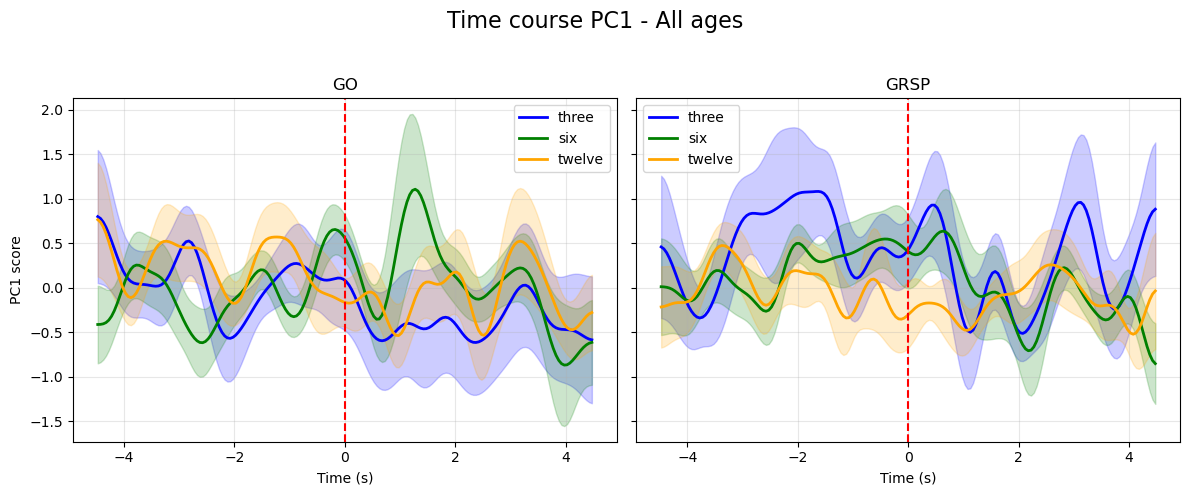

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

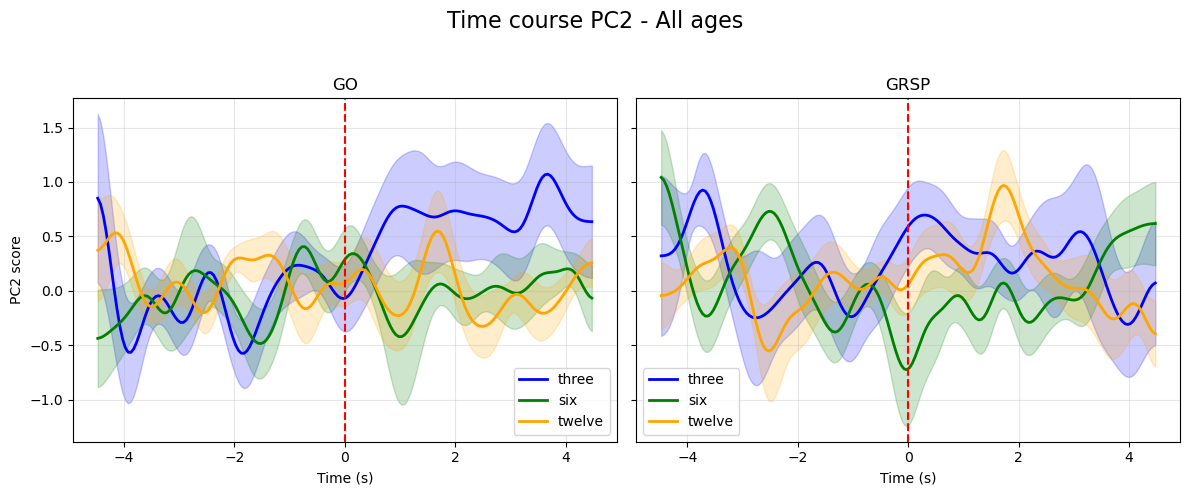

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

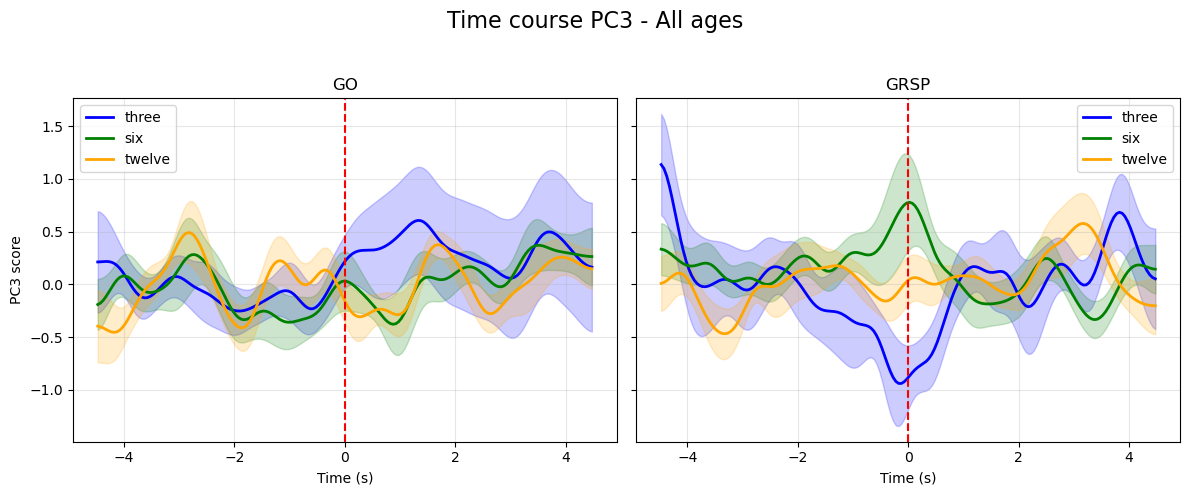

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

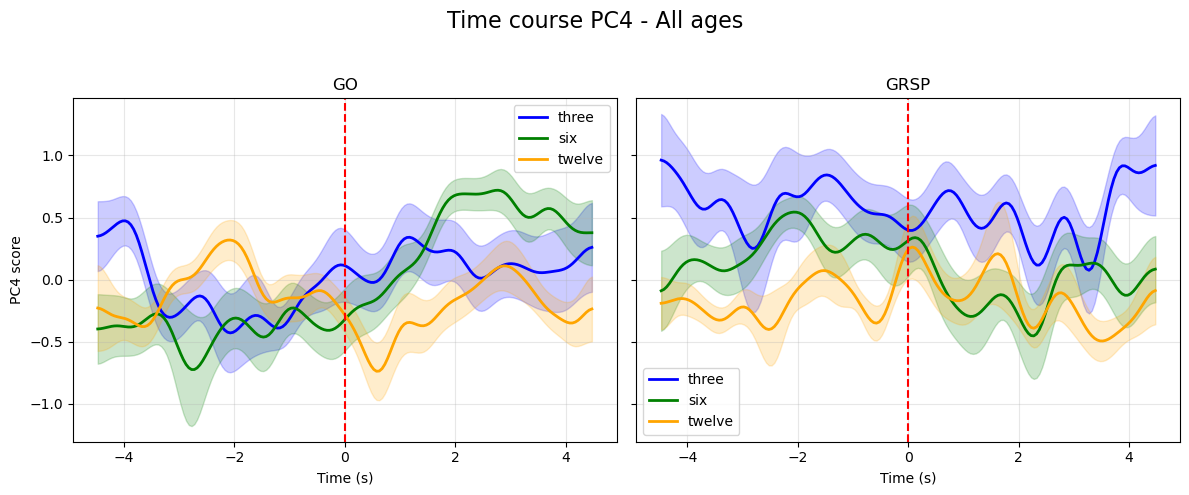

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

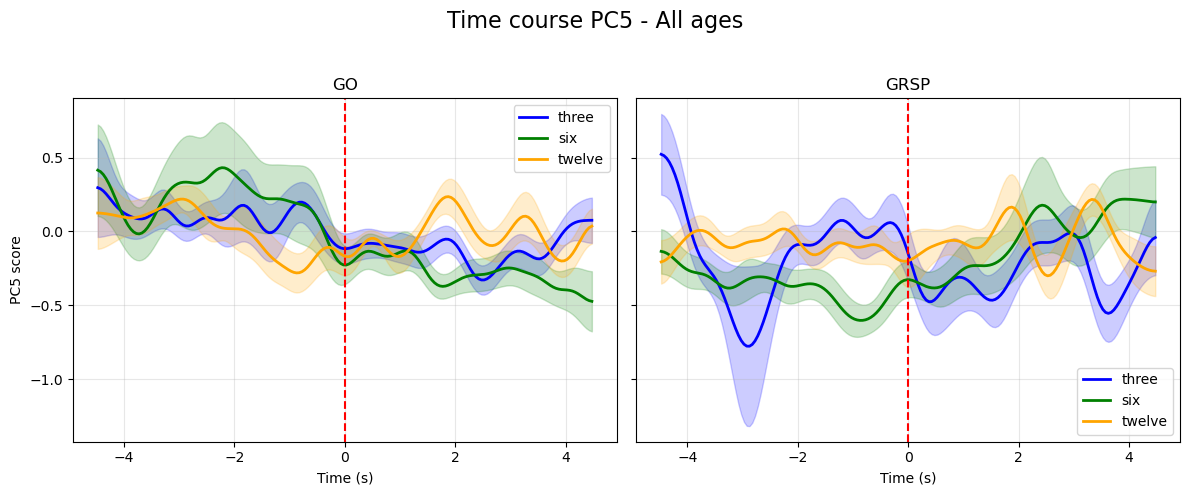

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

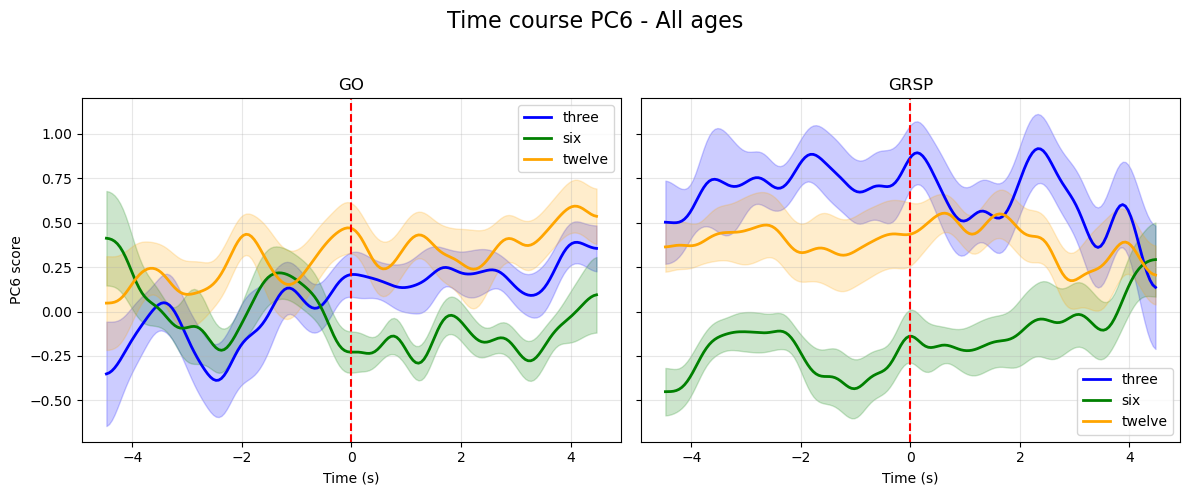

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

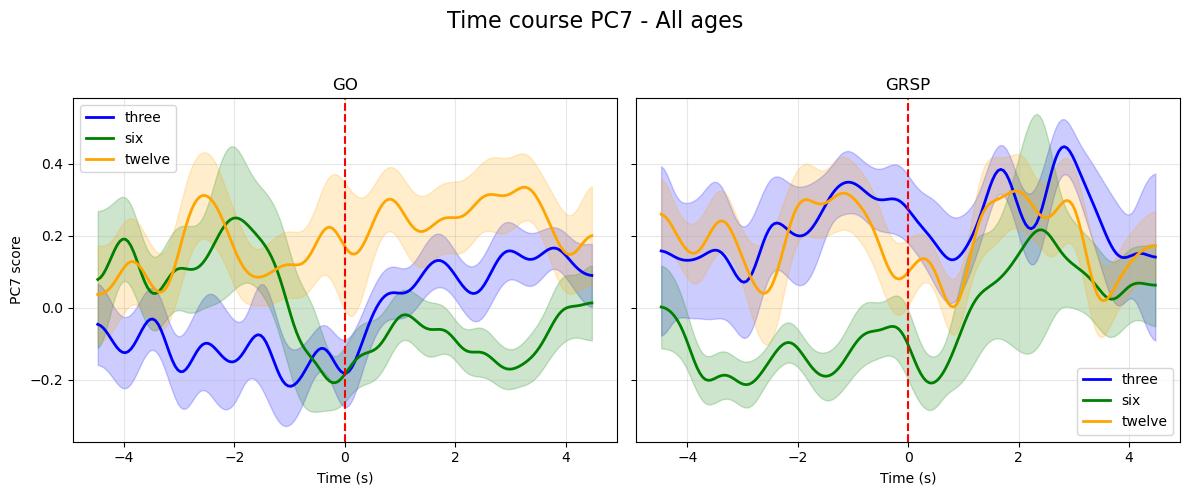

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

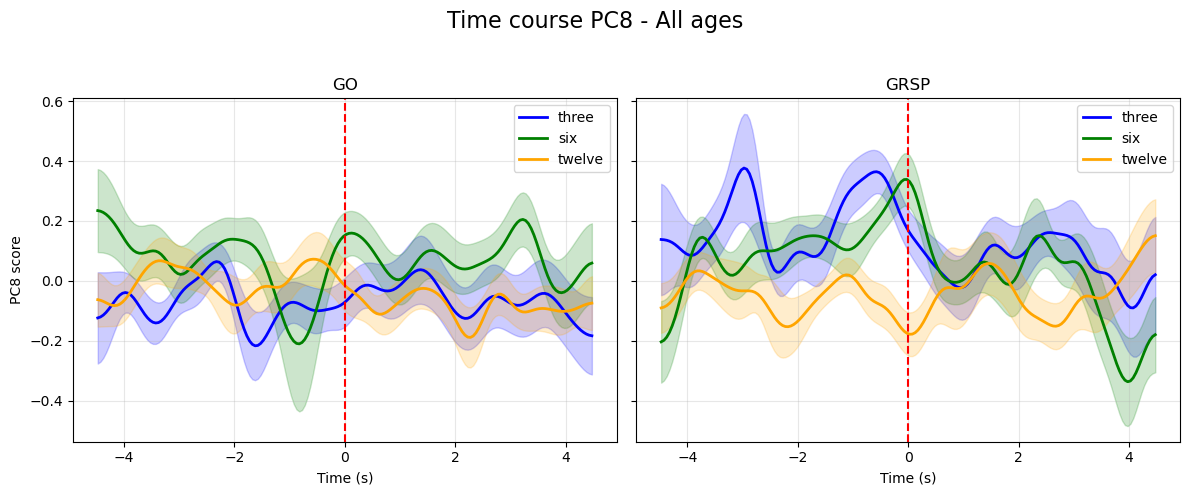

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

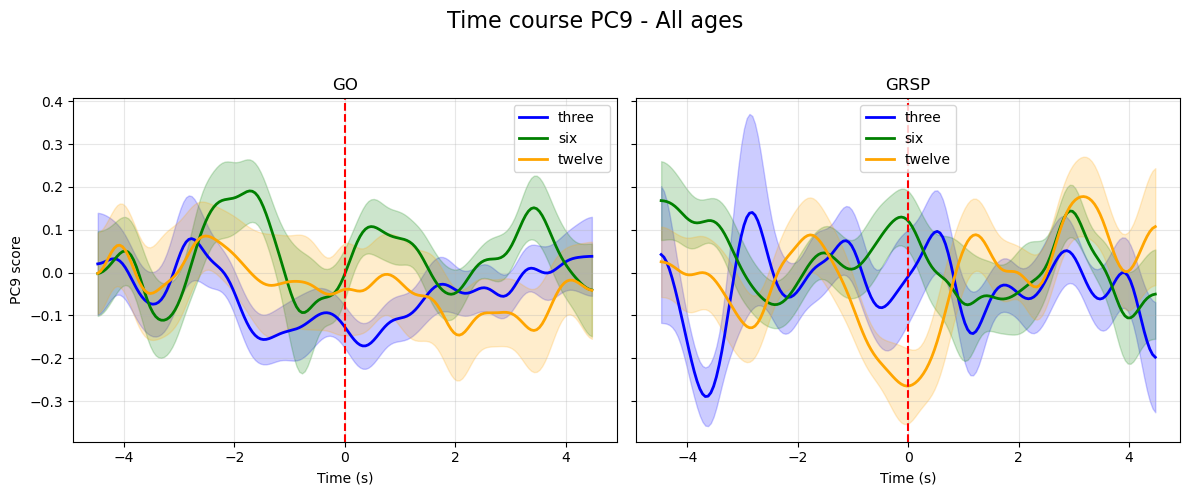

/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.

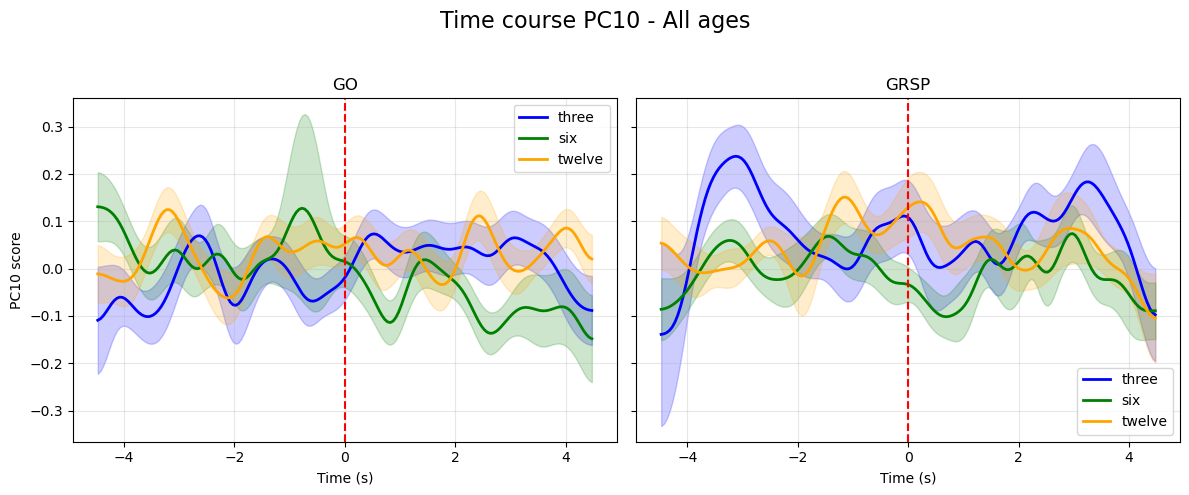

In [12]:
ages = ['three', 'six', 'twelve']
epoch_types = ['go', 'grsp']
pcs = list(range(1, 11))  # PC1 à PC10
colors = {'three': 'blue', 'six': 'green', 'twelve': 'orange'}

for pc in pcs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    for i, epoch_type in enumerate(epoch_types):
        ax = axes[i]
        
        for age in ages:
            df = pd.read_csv(f"/home/ldurieux/devmobeta_grasp/bursts_with_pc_{age}.csv")
            df['time'] = pd.to_numeric(df['time'], errors='coerce')
            df[f'PC{pc}'] = pd.to_numeric(df[f'PC{pc}'], errors='coerce')

            time_axes, c_rates, group_means = compute_pc_evolution(df, pcs=[pc], bin_dt=0.05, smth_kern=5)
            
            if group_means[epoch_type][f'PC{pc}'] is None:
                continue

            mean_rate = group_means[epoch_type][f'PC{pc}']
            subj_array =  c_rates[epoch_type][f'PC{pc}']
            
            # SEM
            if subj_array is not None and subj_array.shape[0] > 1:
                sem_rate = np.std(subj_array, axis=0) / np.sqrt(subj_array.shape[0])
                ax.fill_between(time_axes[epoch_type],
                                mean_rate - sem_rate,
                                mean_rate + sem_rate,
                                color=colors[age], alpha=0.2)

            ax.plot(time_axes[epoch_type], mean_rate, label=age, color=colors[age], linewidth=2)

        ax.axvline(0, color='red', linestyle='--')
        ax.set_title(epoch_type.upper())
        ax.set_xlabel('Time (s)')
        ax.grid(True, alpha=0.3)
        if i == 0:
            ax.set_ylabel(f'PC{pc} score')
        ax.legend()

    fig.suptitle(f'Time course PC{pc} - All ages', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'Time course PC{pc} - all age.png', dpi = 300)
    plt.show()


In [13]:
def compute_diff_prepost(c_rates_dict, time_axes_dict):
    diff_scores = {}
    for age, c_rates in c_rates_dict.items():
        time_axes = time_axes_dict[age]  
        diff_scores[age] = {}
        pre_go = time_axes['go'] < 0
        post_go = time_axes['go'] >= 0
        for pc, arr in c_rates['go'].items():
            mean_pre = np.nanmean(arr[:, pre_go], axis=1)
            mean_post = np.nanmean(arr[:, post_go], axis=1)
            diff_scores[age][pc] = (mean_pre, mean_post)
    return diff_scores

In [14]:
def paired_permutation_test(data1, data2, n_permutations=100000):
    paired_differences = data1 - data2
    obs_diff = np.mean(paired_differences)
    perm_diffs = []
    for _ in range(n_permutations):
        signs = np.random.choice([-1, 1], size=len(paired_differences))
        permuted_differences = paired_differences * signs
        perm_diffs.append(np.mean(permuted_differences))
    perm_diffs = np.array(perm_diffs)
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
    return obs_diff, p_value

In [16]:
ages = ['three', 'six', 'twelve']
pcs = list(range(1, 11))  # PC1 à PC10

c_rates_dict = {}
time_axes_dict = {}
results = []
for age in ages:
    df = pd.read_csv(f"/home/ldurieux/devmobeta_grasp/bursts_with_pc_{age}.csv")
    df['time'] = pd.to_numeric(df['time'], errors='coerce')
    for pc in pcs:
        df[f'PC{pc}'] = pd.to_numeric(df[f'PC{pc}'], errors='coerce')

    time_axes, c_rates, _ = compute_pc_evolution(df, pcs=pcs, bin_dt=0.05, smth_kern=5)
    c_rates_dict[age] = c_rates
    time_axes_dict[age] = time_axes

diff_scores = compute_diff_prepost(c_rates_dict, time_axes_dict)

for age in ages:
    print(f"\nAge: {age}")
    for pc in pcs:
        mean_pre, mean_post = diff_scores[age][f'PC{pc}']
        obs_diff, p_value = paired_permutation_test(mean_pre, mean_post, n_permutations=100000)
        results.append({
            'age': age,
            'pc': pc,
            'obs_diff': obs_diff,
            'p_value': p_value
        })
        print(f"{f'PC{pc}'}: obs_diff = {obs_diff:.3f}, p = {p_value:.4f}")

results_df = pd.DataFrame(results)


/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.py:38: RuntimeWarning: Mean of empty slice
  subj_mean = np.nanmean(trial_means, axis=0)
/tmp/ipykernel_13404/1051747767.


Age: three
PC1: obs_diff = 0.472, p = 0.4103
PC2: obs_diff = -0.722, p = 0.0623
PC3: obs_diff = -0.388, p = 0.7450
PC4: obs_diff = -0.228, p = 0.1432
PC5: obs_diff = 0.218, p = 0.0479
PC6: obs_diff = -0.295, p = 0.0124
PC7: obs_diff = -0.199, p = 0.0006
PC8: obs_diff = -0.020, p = 0.8884
PC9: obs_diff = -0.000, p = 0.9927
PC10: obs_diff = -0.063, p = 0.3088

Age: six
PC1: obs_diff = -0.083, p = 0.7311
PC2: obs_diff = -0.072, p = 0.6240
PC3: obs_diff = -0.165, p = 0.3180
PC4: obs_diff = -0.761, p = 0.0000
PC5: obs_diff = 0.484, p = 0.0003
PC6: obs_diff = 0.182, p = 0.0632
PC7: obs_diff = 0.162, p = 0.0664
PC8: obs_diff = -0.019, p = 0.6897
PC9: obs_diff = -0.018, p = 0.6589
PC10: obs_diff = 0.109, p = 0.0043

Age: twelve
PC1: obs_diff = 0.347, p = 0.3222
PC2: obs_diff = 0.111, p = 0.4873
PC3: obs_diff = -0.015, p = 0.9057
PC4: obs_diff = 0.173, p = 0.2232
PC5: obs_diff = 0.029, p = 0.6426
PC6: obs_diff = -0.152, p = 0.0409
PC7: obs_diff = -0.102, p = 0.0282
PC8: obs_diff = 0.083, p = 0